Assignment #3 Question 3 - Lava flowing down: numerical exercise

@author: Alexandra Rochon @collab: Olivia Locke 26/02/24

In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
%matplotlib inline
import imageio

Here's a recommended workflow to guide you:

- Determine the equation to solve (i.e., which parts of the momentum equation are relevant in this problem?)
- Label your code with a brief description, your name, names of your collaborators, and date, following the same setup as the numerical exercise in PS2.
- Set the proper timestep, grid resolution, diffusion coefficient, and gravitational acceleration.
- Use the implicit method and apply the appropriate boundary conditions. Remember that the no-slip condition requires 𝑢(0)=0 at all times at the leftmost edge of your grid.
- Make sure to account for gravity.
- Make sure to include the analytic steady-state solution in your animation at all times as a comparison.
- You may use whichever method you like to produce the animation.

In [2]:
# Set up the grid and advection parameters
H = 10 # lava thickness in cm
Ngrid = 50 
Nsteps = 500
dt = 0.001
dx = H/Ngrid

In [3]:
D = 10**3 # viscosity in cm^2/s
beta = D*dt/dx**2
g = 981 # cm/s^2
alpha = 10 # degrees
x = np.arange(Ngrid)*dx

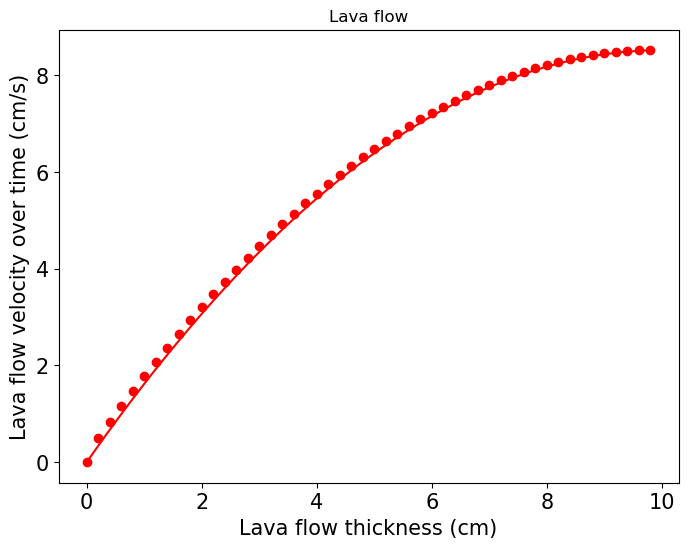

In [4]:
# Initial conditions
f = np.copy(x)*0 # no lava, velocity everywhere

# steady state equation 
u_x = -(g/D)*m.sin(m.radians(alpha))*(1/2 * np.square(x) - H*x)

# Set up plot
plt.ion()
fig, ax = plt.subplots (1,1, dpi=100)
fig.set_figheight(6)
fig.set_figwidth(8)

ax.set_title('Lava flow')
ax.set_xlabel('Lava flow thickness (cm)', fontsize = 15)
ax.set_ylabel('Lava flow velocity over time (cm/s)', fontsize = 15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

# Plotting initial state in the background for reference
ax.plot(x, u_x, "r-")

# We will be updating these plotting objects
plt_obj, = ax.plot(x, f, 'ro')
fig.canvas.draw()

# Evolution
frames = []  # List to store frames for GIF

count = 0

# Evolution
while count < Nsteps:
    
    ## Calculate diffusion first
    # Setting Up matrices for diffusion operator
    A = np.eye(Ngrid) * (1.0 + 2.0 * beta) + np.eye(Ngrid, k=1) * -beta + np.eye(Ngrid, k=-1) * -beta

    ## Boundary conditions to keep the last element fixed
    # This ensures fin the last cell stays fixed at all times under diffusion
    A[-1][-1] = 1 + beta
    A[0][0] = 1
    A[0][1] = 0
    
        
    # Solving for the next timestep
    f = np.linalg.solve(A, f)    
    f += dt*g*m.sin(m.radians(alpha)) # Update lava flow thickness
    f[0] = 0 # Boundary condition
    
    # update the plot
    plt_obj.set_ydata(f)
           
    fig.canvas.draw()

    frame = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    frame = frame.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    frames.append(frame)
    
    count += 1

# Save frames as an animated GIF using imageio
imageio.mimsave('Volcano_flow.gif', frames, fps=10)
plt.ioff()  # Turn off interactive mode

# if graphic is stuck at steady state, reset kernel and re-run the code